In [1]:
import cv2
import math
import pickle
import numpy as np

from evaluate import FDDBImg, ANIMOO

In [2]:
# choose which output to use here
EVAL_FILE = 'so_mtcnn.pkl'
with open(EVAL_FILE, 'rb') as pfile:
    results = pickle.load(pfile)

In [3]:
truepos = 0
falsepos = 0
falseneg = 0
for img in results:
    met = img.compute_metrics()
    truepos += met[0]
    falsepos += met[1]
    falseneg += met[2]

print(truepos, falsepos, falseneg)
print('Precision', truepos / (truepos + falsepos))
print('Recall', truepos / (truepos + falseneg))

2521 66318 1181
Precision 0.036621682476503145
Recall 0.6809832522960562


In [4]:
orig_dets = []
for img in results:
    _, _, _, pred_det, _ = img.compute_metrics(returnArrs=True)
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        orig_dets.append((img.pred_conf[i], pred_det[i]))

dets = sorted(orig_dets)
print(dets[:100])

[(6.335185154249245e-11, False), (1.0268899508503182e-08, False), (1.1576218206243993e-08, False), (2.2161264823239435e-08, False), (2.2786677433828118e-08, False), (3.081391142245593e-08, False), (5.056535457015343e-08, False), (5.291971660881245e-08, False), (8.350694002956516e-08, False), (8.88221691752733e-08, False), (1.0310196074669875e-07, False), (1.0433023334144309e-07, False), (1.1536591415506336e-07, False), (1.2523710779532848e-07, False), (1.2757986667111254e-07, False), (1.288820072886665e-07, False), (1.298611209676892e-07, False), (1.8870046858410205e-07, False), (2.396305376350938e-07, False), (2.4996032266244583e-07, False), (3.320245696158963e-07, False), (3.454133263858239e-07, False), (3.631514573498862e-07, False), (3.777888935019291e-07, False), (3.927659975033748e-07, False), (4.215290800857474e-07, False), (4.33123403809077e-07, False), (4.3514882008821587e-07, False), (4.611700035184185e-07, False), (4.997486939828377e-07, False), (5.46264857348433e-07, False)

In [5]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

2521 66318 1181


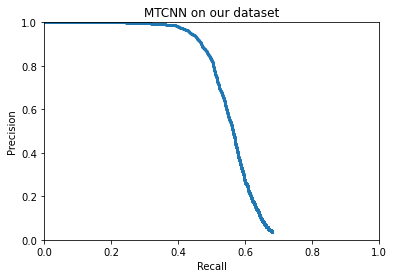

In [6]:
import matplotlib.pyplot as plt

plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on our dataset')
plt.show()

In [7]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

NameError: name 'metrics' is not defined

In [ ]:
# try cartoon faces
cartoon_dets = []
truepos = 0
falsepos = 0
falseneg = 0
for idx in range(1000):
    img = results[idx]
    tp, fp, fn, pred_det, _ = img.compute_metrics(returnArrs=True)
    truepos += tp
    falsepos += fp
    falseneg += fn
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        cartoon_dets.append((img.pred_conf[i], pred_det[i]))

cartoon_dets = sorted(cartoon_dets, key = (lambda x : x[0]))
print('TP, FP, FN:', truepos, falsepos, falseneg)

TP, FP, FN: 840 39859 1076


In [ ]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in cartoon_dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

840 39859 1076


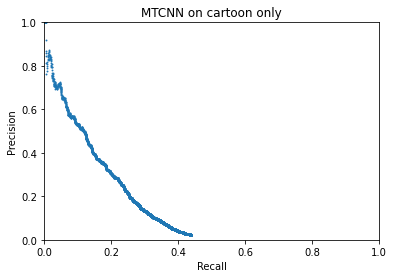

In [ ]:
plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on cartoon only')
plt.show()

In [ ]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

In [ ]:
# now try just real images
real_dets = []
truepos = 0
falsepos = 0
falseneg = 0
for idx in range(1000, 2000):
    img = results[idx]
    tp, fp, fn, pred_det, _ = img.compute_metrics(returnArrs=True)
    truepos += tp
    falsepos += fp
    falseneg += fn
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        real_dets.append((img.pred_conf[i], pred_det[i]))

real_dets = sorted(real_dets, key = (lambda x : x[0]))
print('TP, FP, FN:', truepos, falsepos, falseneg)

TP, FP, FN: 1681 26459 105


In [ ]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in real_dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

1681 26459 105


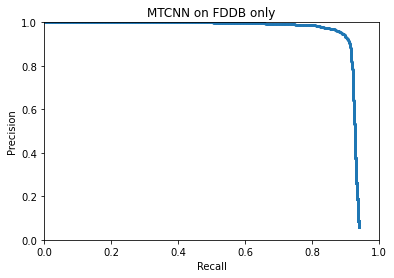

In [ ]:
plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on FDDB only')
plt.show()

In [ ]:
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)